<a href="https://colab.research.google.com/github/RehanKhan-007/CODSOFT/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
df = pd.read_csv('Iris.csv')

In [45]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
iris = pd.read_csv('/content/Iris.csv')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [47]:
# Check dublication
iris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [48]:
iris.duplicated().any()

True

In [49]:
duplicate_count = iris.duplicated().sum()
print("Total Duplicate Record:", duplicate_count)

Total Duplicate Record: 3


In [50]:
# Remove dublication values
iris.drop_duplicates(inplace=True)

iris.duplicated().sum()

0

In [51]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [52]:
# data summary
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


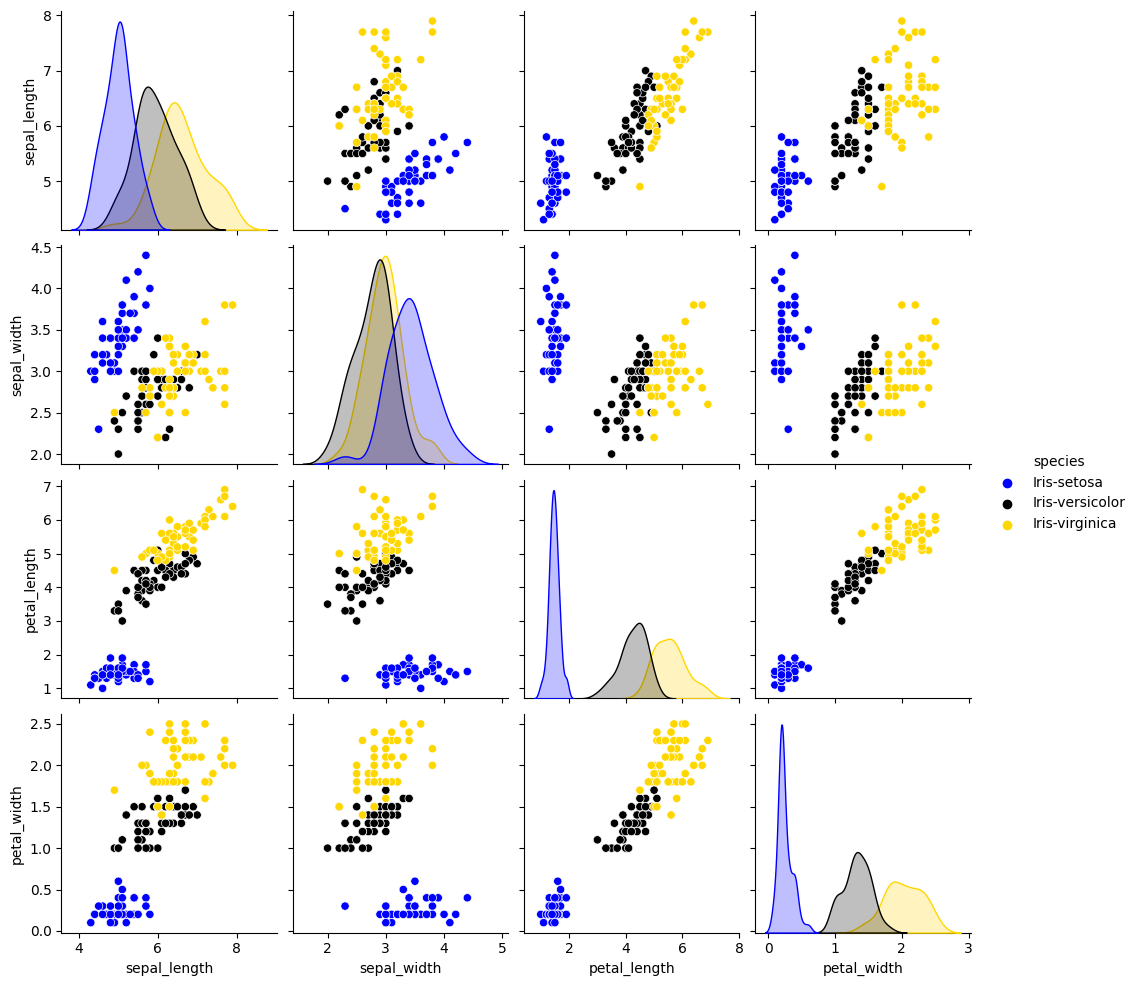

In [53]:
sns.pairplot(iris, hue="species", palette={"Iris-setosa": "blue", "Iris-versicolor": "black", "Iris-virginica": "gold"})
plt.show()

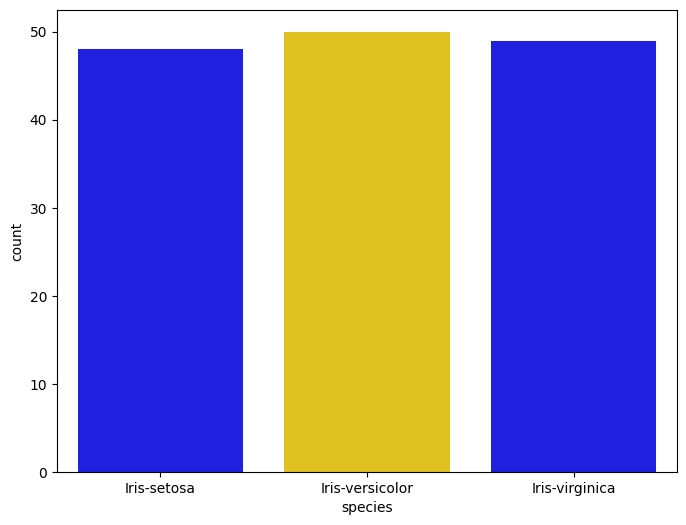

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(x="species", data=iris, palette={"Iris-setosa": "blue", "Iris-versicolor": "gold", "Iris-virginica": "blue"})
plt.show()

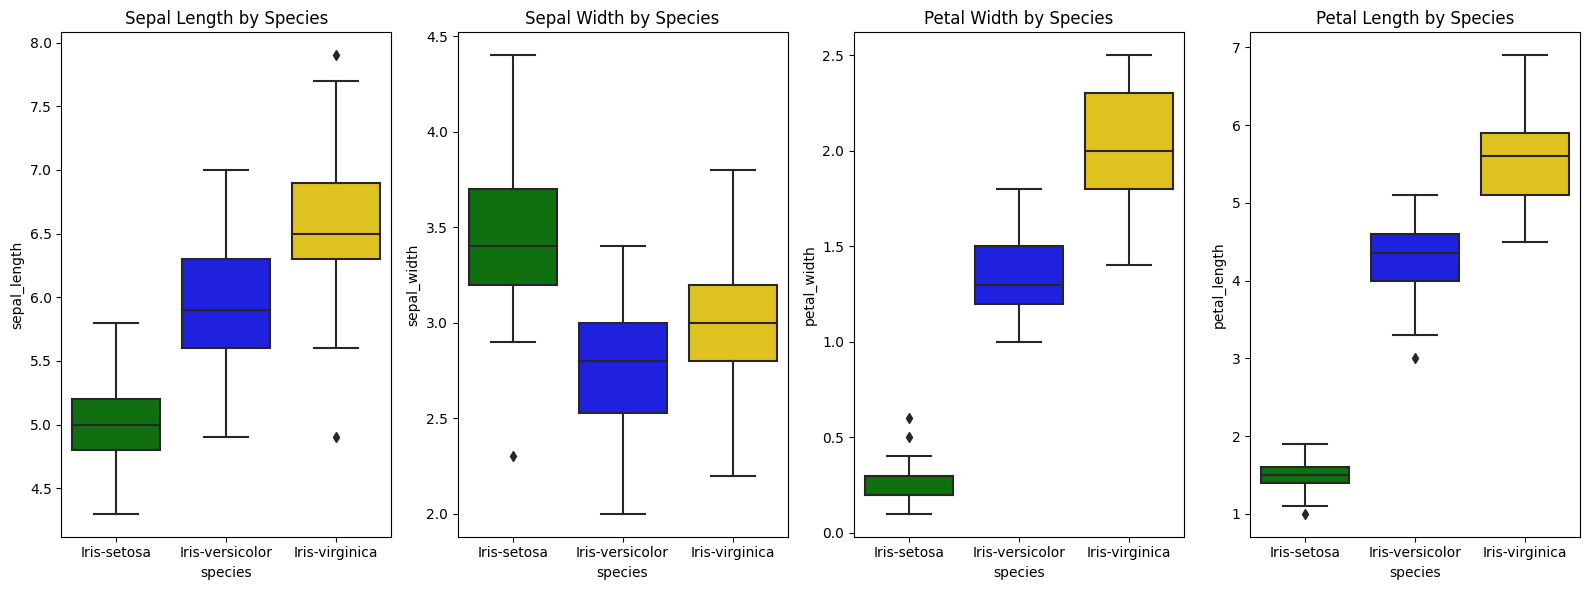

In [64]:
plt.figure(figsize=(16, 6))

# Box Plot for Sepal Length
plt.subplot(141)
sns.boxplot(x="species", y="sepal_length", data=iris, palette={"Iris-setosa": "green", "Iris-versicolor": "blue", "Iris-virginica": "gold"})
plt.title("Sepal Length by Species")

# Box Plot for Sepal Width
plt.subplot(142)
sns.boxplot(x="species", y="sepal_width", data=iris, palette={"Iris-setosa": "green", "Iris-versicolor": "blue", "Iris-virginica": "gold"})
plt.title("Sepal Width by Species")

# Box Plot for Petal Width
plt.subplot(143)
sns.boxplot(x="species", y="petal_width", data=iris, palette={"Iris-setosa": "green", "Iris-versicolor": "blue", "Iris-virginica": "gold"})
plt.title("Petal Width by Species")

# Box Plot for Petal Length
plt.subplot(144)
sns.boxplot(x="species", y="petal_length", data=iris, palette={"Iris-setosa": "green", "Iris-versicolor": "blue", "Iris-virginica": "gold"})
plt.title("Petal Length by Species")

plt.tight_layout()
plt.show()

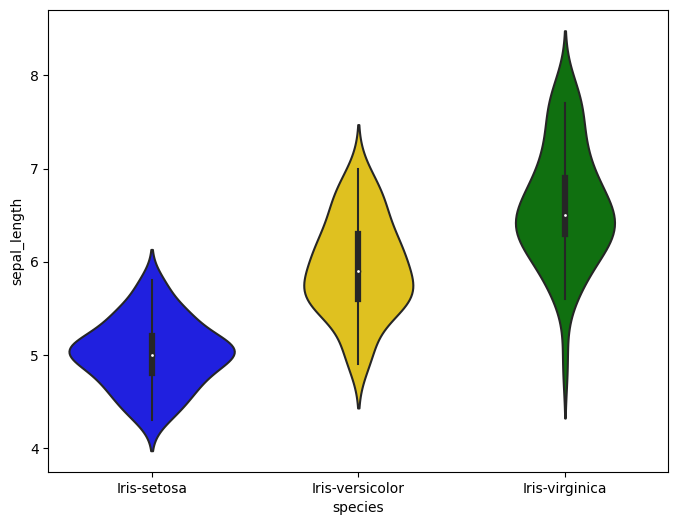

In [65]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="species", y="sepal_length", data=iris, palette={"Iris-setosa": "blue", "Iris-versicolor": "gold", "Iris-virginica": "green"})
plt.show()

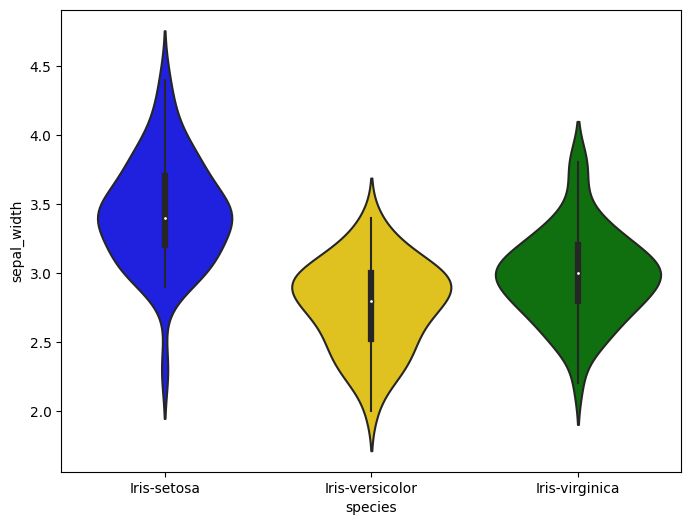

In [66]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="species", y="sepal_width", data=iris, palette={"Iris-setosa": "blue", "Iris-versicolor": "gold", "Iris-virginica": "green"})
plt.show()

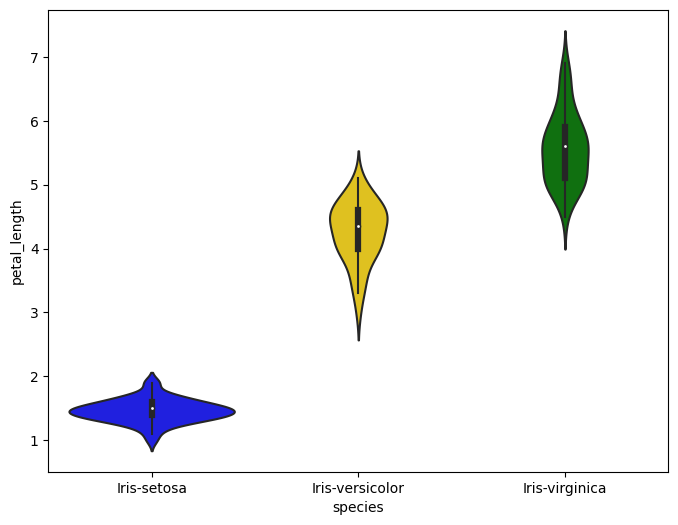

In [67]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="species", y="petal_length", data=iris, palette={"Iris-setosa": "blue", "Iris-versicolor": "gold", "Iris-virginica": "green"})
plt.show()

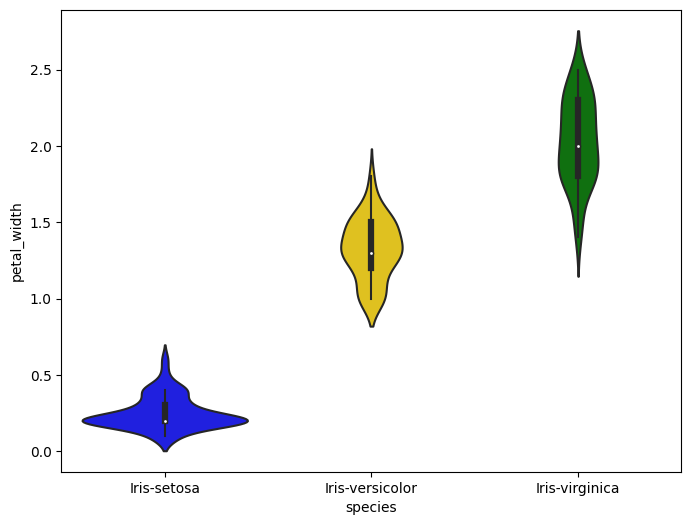

In [68]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="species", y="petal_width", data=iris, palette={"Iris-setosa": "blue", "Iris-versicolor": "gold", "Iris-virginica": "green"})
plt.show()

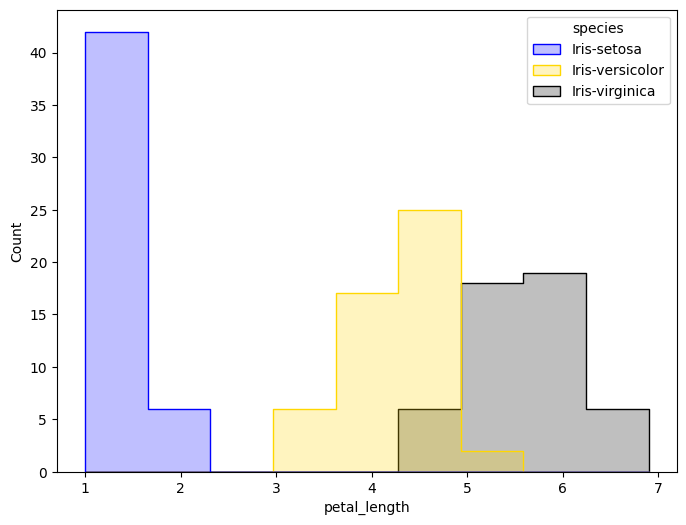

In [69]:
plt.figure(figsize=(8, 6))
sns.histplot(data=iris, x="petal_length", hue="species", element="step", common_norm=False, palette={"Iris-setosa": "blue", "Iris-versicolor": "gold", "Iris-virginica": "black"})
plt.show()

In [77]:
x=iris.iloc[:,:4]
y=iris.iloc[:,4]

In [78]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [88]:
# Create the LogisticRegression model
model_lg=LogisticRegression()

# Fit the model to the training data
model_lg.fit(x_train,y_train)

LogisticRegression()

In [87]:
# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=0)

# Fit the model to the training data
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [86]:
# Create the Sport Vector Classifier
model_svm = SVC(kernel='linear')
model_svm.fit(x_train, y_train)

SVC(kernel='linear')

In [84]:
# Create the KNeighbors Classifier model
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [83]:
# Create the Decision Tree Classifier model
model_dt = DecisionTreeClassifier(random_state=0)
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [82]:
# Create the Neural Network model
model_nn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=0)
model_nn.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=0)

In [89]:
y_pred = model_lg.predict(x_test)

y_pred_svm = rf_model.predict(x_test)

y_pred_knn = model_svm.predict(x_test)

y_pred_dt = model_knn.predict(x_test)

y_pred_rf = model_dt.predict(x_test)

y_pred_nn = model_nn.predict(x_test)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted_LR': y_pred, 'Predicted_RF': y_pred_rf,
                           'Predicted_SVM': y_pred_svm, 'Predicted_KNN': y_pred_knn,
                           'Predicted_DT': y_pred_dt, 'Predicted_NN':y_pred_nn})

print(results_df)

              Actual     Predicted_LR     Predicted_RF    Predicted_SVM  \
7        Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa   
24       Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa   
27       Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa   
122   Iris-virginica   Iris-virginica   Iris-virginica   Iris-virginica   
146   Iris-virginica   Iris-virginica   Iris-virginica   Iris-virginica   
53   Iris-versicolor  Iris-versicolor  Iris-versicolor  Iris-versicolor   
45       Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa   
22       Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa   
114   Iris-virginica   Iris-virginica   Iris-virginica   Iris-virginica   
26       Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa   
42       Iris-setosa      Iris-setosa      Iris-setosa      Iris-setosa   
80   Iris-versicolor  Iris-versicolor  Iris-versicolor  Iris-versicolor   
133   Iris-virginica   Ir

In [90]:
# Function to evaluate and print model performance
def evaluate_model(model_name, y_true, y_pred):
    print(f"Model: {model_name}")

    # Confusion Matrix
    confusion = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(confusion)

    # Classification Report
    report = classification_report(y_true, y_pred, target_names=iris['species'].unique())
    print("Classification Report:")
    print(report)

    # Accuracy Score
    accuracy = accuracy_score(y_true, y_pred) * 100
    print(f"Accuracy: {accuracy:.2f}%")
    print("-" * 40)

evaluate_model("**Logistic Regression**", y_test, y_pred)
evaluate_model("**Random Forest**", y_test, y_pred_rf)
evaluate_model("**Support Vector Machine**", y_test, y_pred_svm)
evaluate_model("**K-Nearest Neighbors**", y_test, y_pred_knn)
evaluate_model("**Decision Tree**", y_test, y_pred_dt)
evaluate_model("**Neural Network**", y_test, y_pred_nn)

Model: **Logistic Regression**
Confusion Matrix:
[[15  0  0]
 [ 0 13  0]
 [ 0  0  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        37
      macro avg       1.00      1.00      1.00        37
   weighted avg       1.00      1.00      1.00        37

Accuracy: 100.00%
----------------------------------------
Model: **Random Forest**
Confusion Matrix:
[[15  0  0]
 [ 0 13  0]
 [ 0  0  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        37
      macro avg       1.00      1.00    

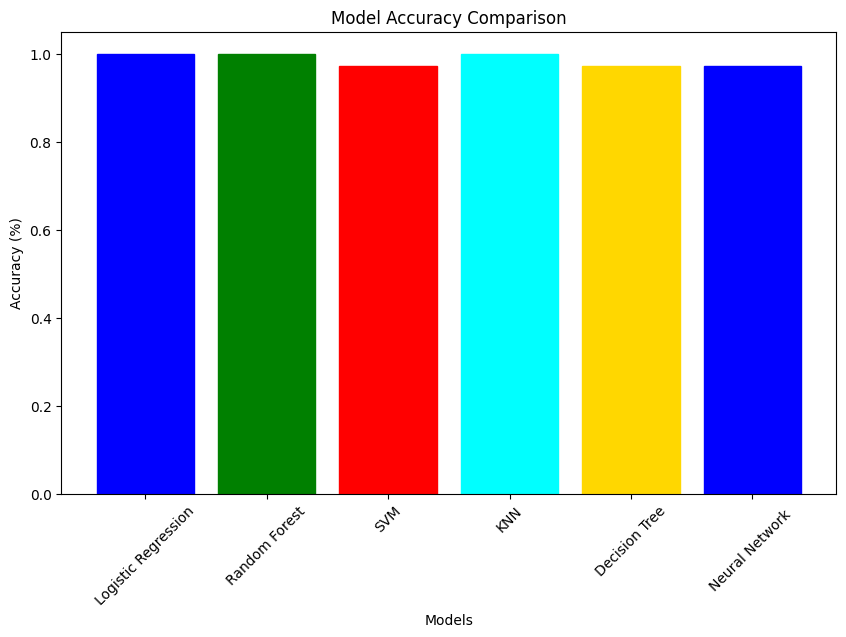

In [91]:
import matplotlib.pyplot as plt
accuracy_scores = [accuracy_score(y_test, y_pred),
                   accuracy_score(y_test, y_pred_rf),
                   accuracy_score(y_test, y_pred_svm),
                   accuracy_score(y_test, y_pred_knn),
                   accuracy_score(y_test, y_pred_dt),
                   accuracy_score(y_test, y_pred_nn)
                  ]


model_names = ["Logistic Regression", "Random Forest", "SVM", "KNN", "Decision Tree","Neural Network "]

colors = ['blue', 'green', 'red', 'cyan', 'gold','blue']

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores)
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=45)
plt.show()

In [56]:
x = df.iloc[: , 0:4].values
y = df.iloc[:,4].values

In [58]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
encode = LabelEncoder()
y = encode.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=.20)

In [63]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=4)

In [70]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 0,
       2, 0, 2, 0, 0, 1, 1, 2])

In [71]:
y_test

array([2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0,
       2, 0, 2, 0, 0, 1, 1, 2])

In [72]:
accuracy_score(y_test , y_pred)

0.9666666666666667

In [73]:
test_errors = []

for k in range(1,10):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train , y_train)


    y_pred_test = model.predict(X_test)
    error = 1- accuracy_score(y_test , y_pred_test)
    test_errors.append(error)

test_errors

[0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.0]

In [74]:
model = LogisticRegression()
model.fit(X_train , y_train)

LogisticRegression()

In [75]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0,
       2, 0, 2, 0, 0, 2, 1, 2])

In [76]:
accuracy_score(y_test , y_pred)

0.9666666666666667